<a href="https://colab.research.google.com/github/siddhengineer/Speech-Emotion-Recognition/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Imports

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
from pathlib import Path
import librosa.display
from IPython.display import Audio
from scipy.io.wavfile import read
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Path to dataset in Google Drive
dataset_dir = Path('/content/drive/MyDrive/archive')

# Getting all audio file paths
audio_paths = list(dataset_dir.glob('**/*.wav'))

# Extracting emotion labels from filenames
emotion_labels = [path.stem.split('_')[-1].lower() for path in audio_paths]

# Creating DataFrame with audio file paths and emotion labels
audio_df = pd.DataFrame({'audio_file': audio_paths, 'emotion': emotion_labels}).sample(frac=1).reset_index(drop=True)

print('Dataset loaded')

Dataset loaded



###Audio Processing Functions with Some Additional Tunings

In [ ]:
def load_audio(path):
    try:
        data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
        return data, sample_rate
    except Exception as e:
        print(f"Error loading file {path}: {e}")
        return None, None

In [ ]:
def add_noise(data):
    noise_value = 0.015 * np.random.uniform() * np.amax(data)
    return data + noise_value * np.random.normal(size=data.shape[0])

In [ ]:
def stretch_audio(data, rate=0.9):
    return librosa.effects.time_stretch(data, rate=rate)

In [ ]:
def change_pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

###Feature Extraction

In [ ]:
def extract_features(data, sample_rate):
    features = [
        np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_fft=512).T, axis=0),
    ]
    return np.hstack(features)

In [ ]:

def export_features(path):
    data, sample_rate = load_audio(path)
    if data is None:
        return np.array([])
    result = [extract_features(data, sample_rate)]
    noisy_data = add_noise(data)
    result.append(extract_features(noisy_data, sample_rate))
    stretched_pitch = change_pitch(stretch_audio(data), sample_rate)
    result.append(extract_features(stretched_pitch, sample_rate))
    return np.array(result)

In [ ]:
X_train, y_train = [], []
for path, emotion in zip(audio_df.audio_file, audio_df.emotion):
    features = export_features(path)
    if features.size > 0:
        for element in features:
            X_train.append(element)
            y_train.append(emotion)

In [ ]:
feature_dataframe = pd.DataFrame(X_train)
feature_dataframe['EMOTIONS'] = y_train

In [ ]:
print(feature_dataframe.head())

            0           1          2          3          4          5  \
0 -516.056702   75.354401  13.383645  16.380255 -10.005322   6.088175   
1 -422.749082   37.358571  10.068630   4.013694  -6.107234   3.267108   
2 -534.129761   64.581429   1.003201  10.196638 -14.133275  11.396982   
3 -588.204407  124.171616  25.215961   2.826828  14.193489   5.708711   
4 -538.299784   96.580157  22.735213   6.132676  10.158144   3.431563   

          6          7          8         9  ...        11        12  \
0  2.119497 -14.903222  -8.382961  2.397894  ... -4.588313 -4.373168   
1 -2.028242 -11.866478  -7.917128 -2.174404  ... -7.534415 -3.755721   
2  3.168300 -16.831217  -3.581275  5.420712  ... -1.861815 -4.890244   
3 -7.831172   6.947810 -19.797155 -0.781437  ... -7.808718 -4.331141   
4 -6.862990   1.664306 -14.419938 -5.708940  ... -7.635710 -5.967642   

         13         14         15        16        17         18         19  \
0 -3.159766  -4.407980 -11.404452 -3.541794  7.32

In [ ]:
print(feature_dataframe['EMOTIONS'].value_counts())

EMOTIONS
fear       2400
disgust    2400
ps         2400
angry      2400
neutral    2400
happy      2400
sad        2400
Name: count, dtype: int64


#Checking Some Audio Samples With Above Tunings & Plotting Them

In [ ]:
# Function to plot the waveform of the audio signal
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [ ]:
# Function to display the spectrogram of the audio signal
def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

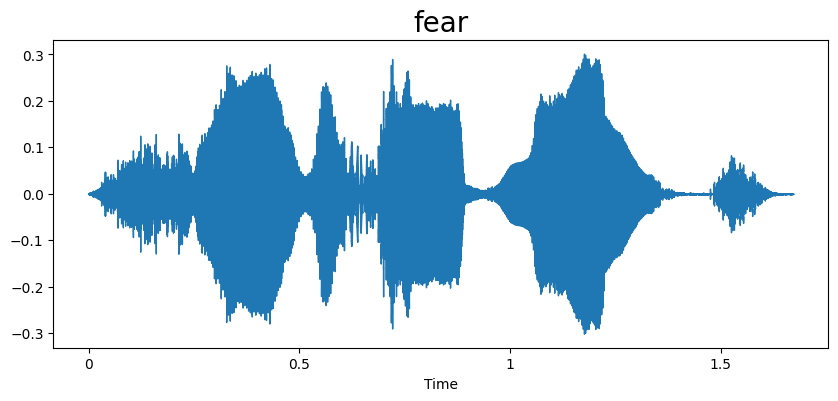

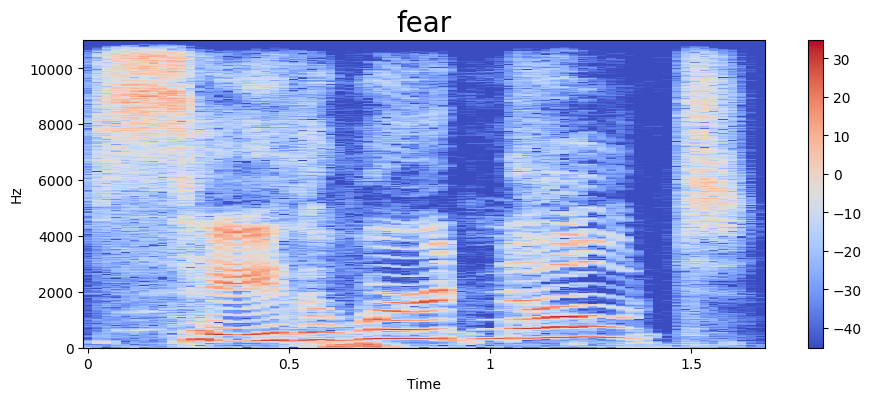

In [ ]:
emotion = 'fear'
path = np.array(audio_df['audio_file'][audio_df['emotion'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Plot the waveform and spectrogram
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)

# Play the audio file
Audio(path)

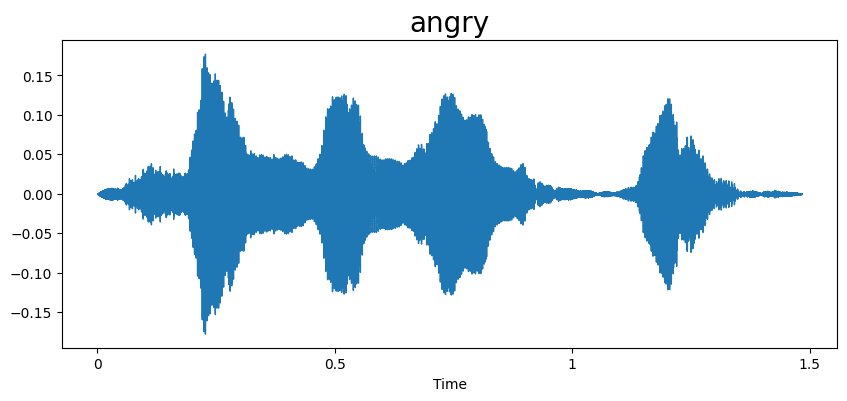

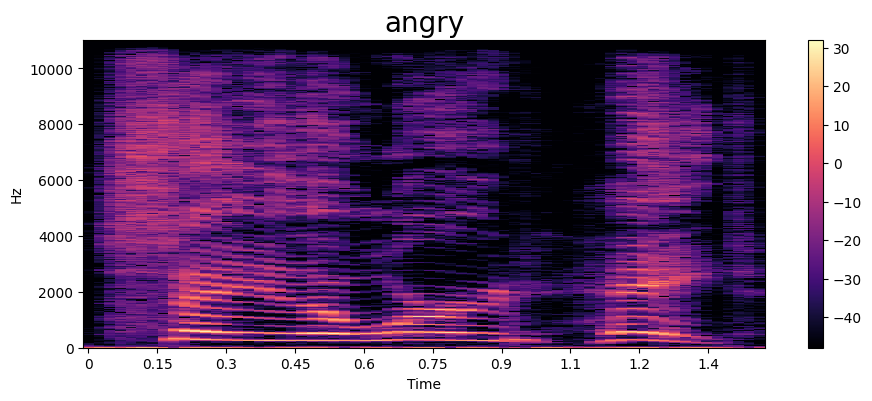

In [ ]:
emotion = 'angry'
path = np.array(audio_df['audio_file'][audio_df['emotion'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Plot the waveform and spectrogram
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)

# Play the audio file
Audio(path)

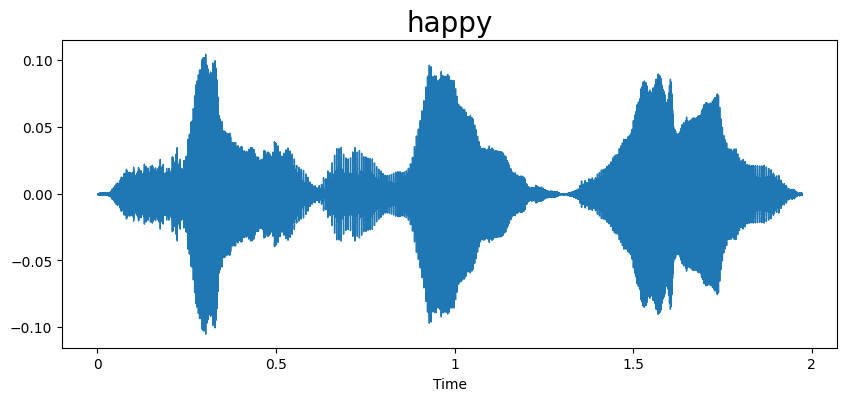

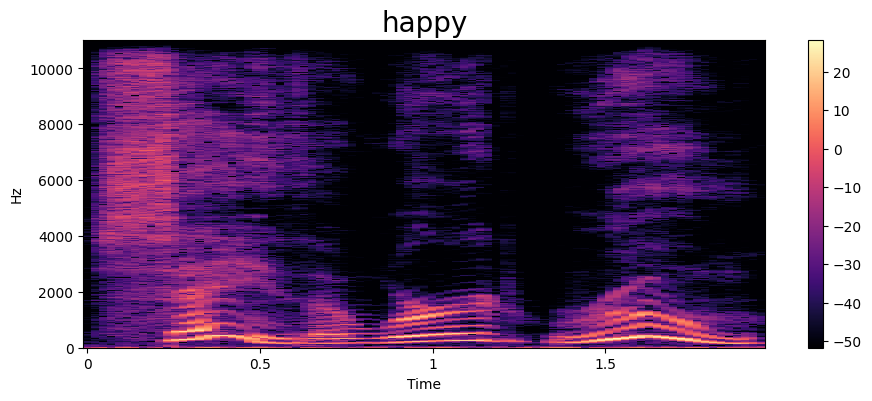

In [ ]:
emotion = 'happy'
path = np.array(audio_df['audio_file'][audio_df['emotion'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Plot the waveform and spectrogram
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)

# Play the audio file
Audio(path)

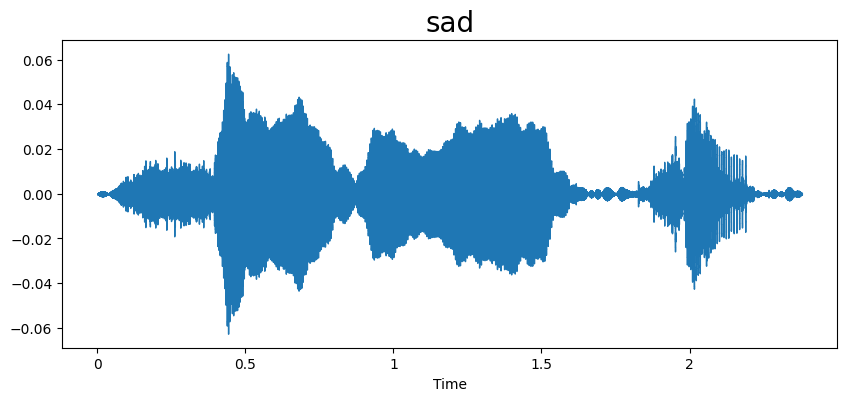

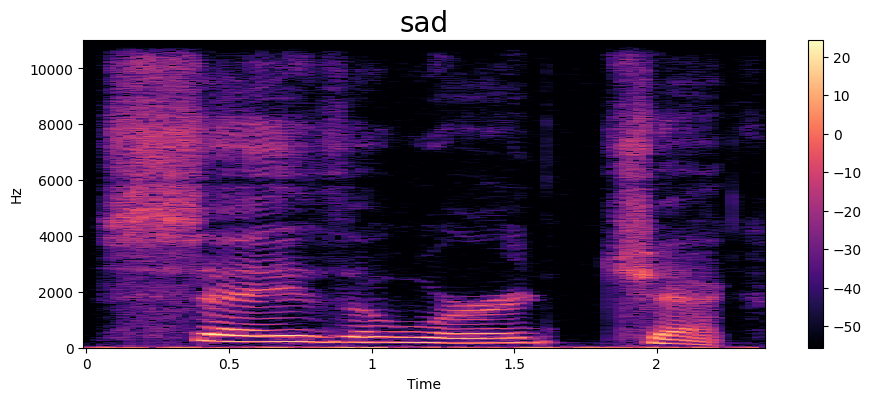

In [ ]:
emotion = 'sad'
path = np.array(audio_df['audio_file'][audio_df['emotion'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Plot the waveform and spectrogram
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)

# Play the audio file
Audio(path)

###Visualization of MFCCs

In [ ]:
audio_file, sr = librosa.load(audio_df['audio_file'][2000])
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr, n_mfcc=13)

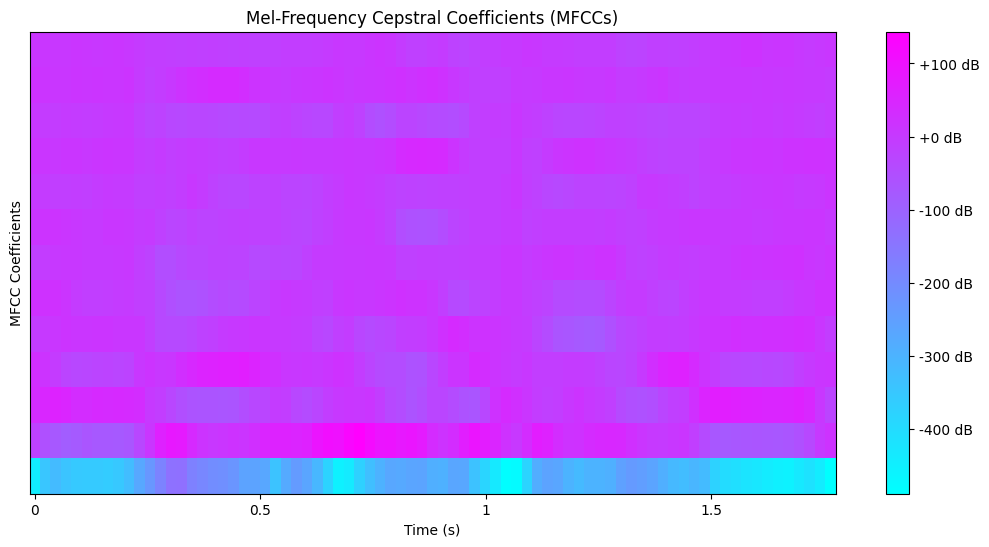

In [ ]:
plt.figure(figsize=(13, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='cool')
plt.title('Mel-Frequency Cepstral Coefficients (MFCCs)')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()

##Preprocesing

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder_label = OneHotEncoder()

X = feature_dataframe.iloc[:, :-1].values
emotions_array = feature_dataframe['EMOTIONS'].values.reshape(-1, 1)
Y = encoder_label.fit_transform(emotions_array).toarray()

print(X.shape)
print(Y.shape)

(16800, 20)
(16800, 7)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11760, 20)
(11760, 7)
(5040, 20)
(5040, 7)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_data = StandardScaler()

X_train = scaler_data.fit_transform(X_train)
X_test = scaler_data.transform(X_test)

#Model Creation (LSTM)

In [ ]:
timesteps = 1
num_features = X_train.shape[1]
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(11760, 1, 20)
(5040, 1, 20)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

In [ ]:
def create_lstm_model(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(128, return_sequences=True),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
lstm_model = create_lstm_model((timesteps, num_features), Y.shape[1])
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 1, 128)              │          76,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,151 (492.78 KB)

 Trainable params: 126,151 (492.78 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [ModelCheckpoint('speech-emotion-recognition.keras', verbose=1, save_best_only=True)]
history = lstm_model.fit(X_train, y_train, batch_size=64, epochs=50, callbacks=callbacks, validation_data=(X_test, y_test))

Epoch 1/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5069 - loss: 1.5781
Epoch 1: val_loss improved from inf to 0.50058, saving model to speech-emotion-recognition.keras
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5076 - loss: 1.5759 - val_accuracy: 0.8450 - val_loss: 0.5006
Epoch 2/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8504 - loss: 0.4416
Epoch 2: val_loss improved from 0.50058 to 0.21503, saving model to speech-emotion-recognition.keras
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8505 - loss: 0.4412 - val_accuracy: 0.9294 - val_loss: 0.2150
Epoch 3/50
180/184 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9267 - loss: 0.2146
Epoch 3: val_loss improved from 0.21503 to 0.15611, saving model to speech-emotion-recognition.keras
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9268 - loss: 0.2142 - val_accuracy: 0.9435 - val_loss: 0.1561
Epoch 4/50
180/184 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9473 - loss: 0.1561
E

###Visualization of Accuracy

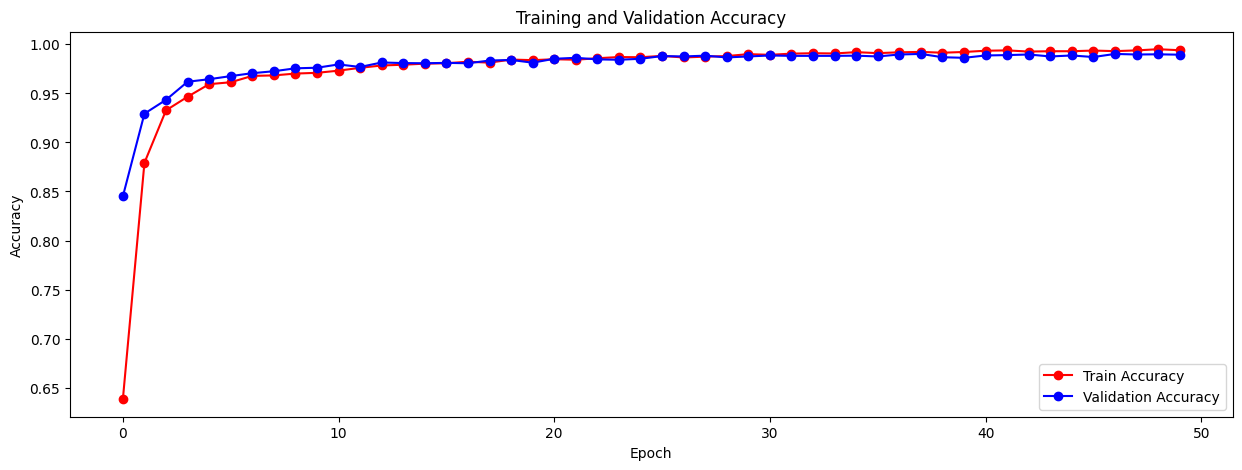

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red', marker='o', linestyle='-')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue', marker='o', linestyle='-')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

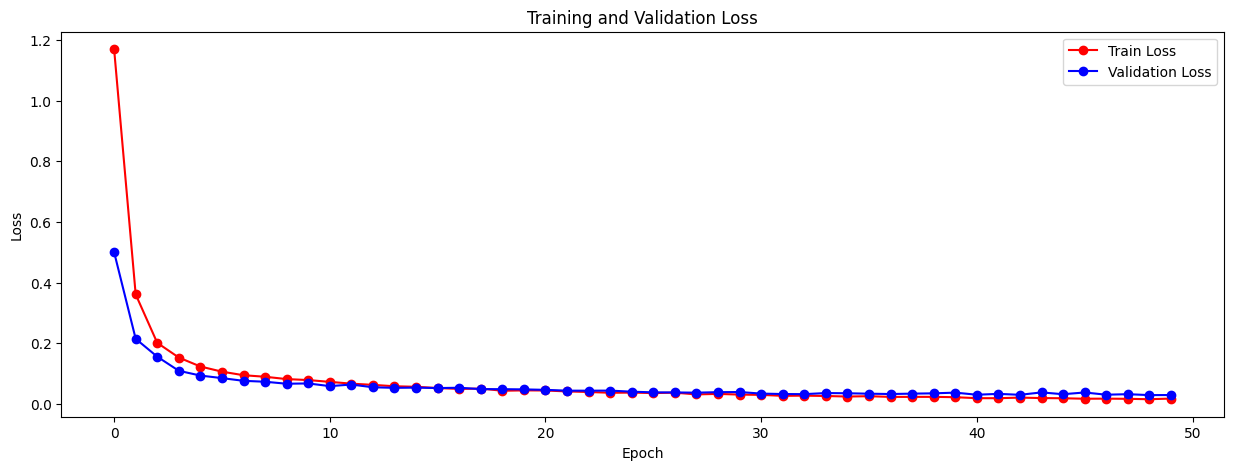

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='Train Loss', color='red', marker='o', linestyle='-')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue', marker='o', linestyle='-')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

###Test Output

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('speech-emotion-recognition.keras')
results = model.evaluate(X_test, y_test)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9881 - loss: 0.0304
Test loss: 0.029500002041459084
Test accuracy: 0.9898809790611267


In [ ]:
test_prediction = model.predict(X_test)
y_pred = encoder_label.inverse_transform(test_prediction)
y_test_inv = encoder_label.inverse_transform(y_test)

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
print(y_pred[0:10])

[['disgust']
 ['fear']
 ['happy']
 ['fear']
 ['angry']
 ['fear']
 ['neutral']
 ['neutral']
 ['disgust']
 ['angry']]


In [ ]:
print(y_test_inv[0:10])

[['disgust']
 ['fear']
 ['disgust']
 ['fear']
 ['angry']
 ['fear']
 ['neutral']
 ['neutral']
 ['disgust']
 ['angry']]


###Confusion Matrix

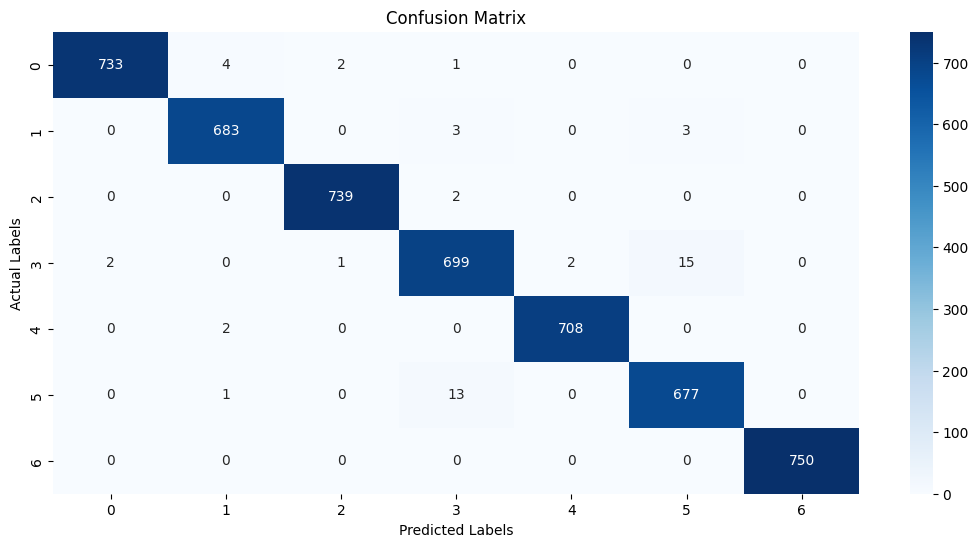

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_prediction, axis=1))
plt.figure(figsize=(13, 6))
sns.heatmap(conf_matrix, linecolor='white', cmap='Blues', annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

###Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_inv, y_pred))

              precision    recall  f1-score   support

       angry       1.00      0.99      0.99       740
     disgust       0.99      0.99      0.99       689
        fear       1.00      1.00      1.00       741
       happy       0.97      0.97      0.97       719
     neutral       1.00      1.00      1.00       710
          ps       0.97      0.98      0.98       691
         sad       1.00      1.00      1.00       750

    accuracy                           0.99      5040
   macro avg       0.99      0.99      0.99      5040
weighted avg       0.99      0.99      0.99      5040

